In [2]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression(random_state=0, solver='lbfgs', max_iter=10000, C=2.5)
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import pickle
file_name = "Log_model.sav"
cls = pickle.load(open(file_name, "rb"))
file_name = "tfidf.sav"
tfidf = pickle.load(open(file_name, "rb"))

c:\users\raymondzhou\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:306: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.21.1 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
c:\users\raymondzhou\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:306: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.21.1 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
c:\users\raymondzhou\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:306: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.21.1 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [19]:
def ngrams(input, n):
  input = input.split(' ')
  output = []
  for i in range(len(input)-n+1):
    output.append(input[i:i+n])
  return output

In [51]:
Sample_correct = ["this is good .", 1]
Sample_misclassify = ["nothing is wrong .", 1]
Sample_incorrect = ["this is not good .", 0]
Sample = Sample_misclassify
example_sentence_word = Sample[0].split(" ")
example_sentence = [' '.join(x) for x in ngrams(Sample[0], 2)]
example_sentence += example_sentence_word
test = tfidf.transform([Sample[0]])
test_y = cls.predict(test)
feature_to_weight = dict()
coeffcients = cls.coef_[0]
index_list = []
feature_name = tfidf.get_feature_names()
for i, j in enumerate(feature_name):
    feature_to_weight[j] = i

output = ""
prediction = cls.predict(test)
confidence = cls.predict_proba(test)[0][cls.predict(test)]
output += "Prediction: %d with confidence %f. " % (cls.predict(test), cls.predict_proba(test)[0][cls.predict(test)])
output += "Predictor thinks words: "
important_word = []
if prediction == 1:
    for w in example_sentence:
        if cls.coef_[0][feature_to_weight[w]] > 0:
            important_word.append(w)
    for w in important_word:
        output += '(' + w +  '), '
    output += "is important, thus it predicted Positive. "
else:
    for w in example_sentence:
        if cls.coef_[0][feature_to_weight[w]] < 0:
            important_word.append(w)
    for w in important_word:
        output += '(' + w +  '), '
    output += "is important, thus it predicted Negative. "
if prediction == Sample[1]:
    output += "Fortunately, it's correct. "
else:
    output += "Unfortunately, it's incorrect. "
    output += "It may be because "
    important_word = []
    if prediction == 0:
        for w in example_sentence:
            if cls.coef_[0][feature_to_weight[w]] > 0:
                important_word.append(w) 
        for w in important_word:
            output += '(' + w +  '), '
        output += " has not enough positive weight to make the sentence Positive "
    else:
        for w in example_sentence:
            if cls.coef_[0][feature_to_weight[w]] < 0:
                important_word.append(w) 
        for w in important_word:
            output += '(' + w +  '), '
        output += " has not enough negative weight to make the sentence Negative "
    output += "or we have double negation which is hard to classify."
print(output)

Prediction: 0 with confidence 0.705951. Predictor thinks words: (is wrong), (wrong .), (nothing), (wrong), (.), is important, thus it predicted Negative. Unfortunately, it's incorrect. It may be because (nothing is), (is),  has not enough positive weight to make the sentence Positive or we have double negation which is hard to classify.


['nothing is', 'is wrong', 'wrong .', 'nothing', 'is', 'wrong', '.']


<IPython.core.display.Javascript object>


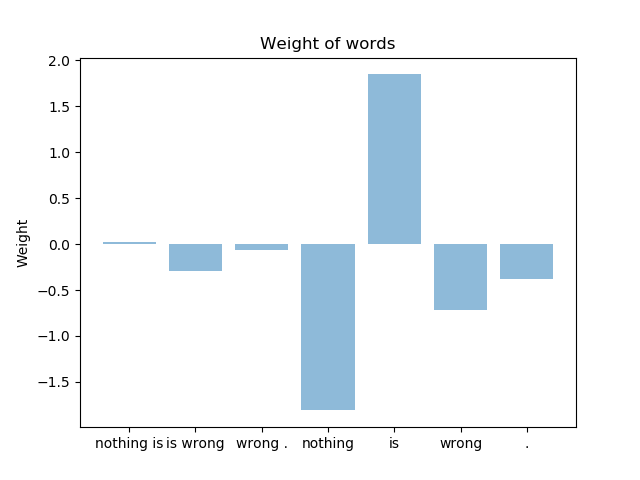

In [52]:


weights = []

print(example_sentence)

for i, w in enumerate(example_sentence):
    index = feature_to_weight.get(w, -1)
    if index == -1:
        weights.append(0.0)
    else:
        weights.append(coeffcients[index])
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = example_sentence
y_pos = np.arange(len(objects))
performance = weights

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Weight')
plt.title('Weight of words')

plt.show()



In [55]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
temp = pickle.load(open("Log_model.sav", "rb"))

test_ = tfidf.transform([Sample[0]])
a = widgets.FloatText(value =temp.predict_proba(test_)[0][temp.predict(test_)], description='Confidence:' )
b = widgets.Text(value = "Positive" if temp.predict(test_)== 1 else "Negative" , description='Predicted:' )

def on_value_change(change):
    temp.coef_[0][feature_to_weight[change['owner'].description]] = change['new']
    b.value = value = "Positive" if temp.predict(test_)== 1 else "Negative"
    a.value = temp.predict_proba(test_)[0][temp.predict(test_)]

kwarg = {}
for w in example_sentence:
    kwarg[w] = widgets.FloatSlider(min= -10.0,max=10.0,step=0.01,value=temp.coef_[0][feature_to_weight[w]], orientation='horizontal', description=w)
    kwarg[w].observe(on_value_change, names = 'value')

output = []
for w in kwarg:
    output.append(kwarg[w])

display(*output)
display(b)
display(a)



FloatSlider(value=0.02115039701773318, description='nothing is', max=10.0, min=-10.0, step=0.01)

FloatSlider(value=-0.2972544898886029, description='is wrong', max=10.0, min=-10.0, step=0.01)

FloatSlider(value=-0.06286233591114954, description='wrong .', max=10.0, min=-10.0, step=0.01)

FloatSlider(value=-1.8103260924289202, description='nothing', max=10.0, min=-10.0, step=0.01)

FloatSlider(value=1.846839462633557, description='is', max=10.0, min=-10.0, step=0.01)

FloatSlider(value=-0.7160459365577988, description='wrong', max=10.0, min=-10.0, step=0.01)

FloatSlider(value=-0.37568028090544997, description='.', max=10.0, min=-10.0, step=0.01)

Text(value='Negative', description='Predicted:')

FloatText(value=0.7059513042650627, description='Confidence:')

In [54]:
def print_arg(**karg):
    for k in karg:
        print(karg[k])
l = {}
l["x"] = 1
print_arg(**l)

1


In [62]:
def print_arg(*arg):
    for i in arg:
        print(i)
l = [1,2,3,4]
print_arg(*l)

1
2
3
4
